In [1]:
#IMports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
train =  pd.read_csv("data/train.csv", index_col = "Id")
test = pd.read_csv("data/test.csv", index_col = "Id")
train.shape, test.shape

((1460, 80), (1459, 79))

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Eda and Cleaning

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


### Missing Value Analysis

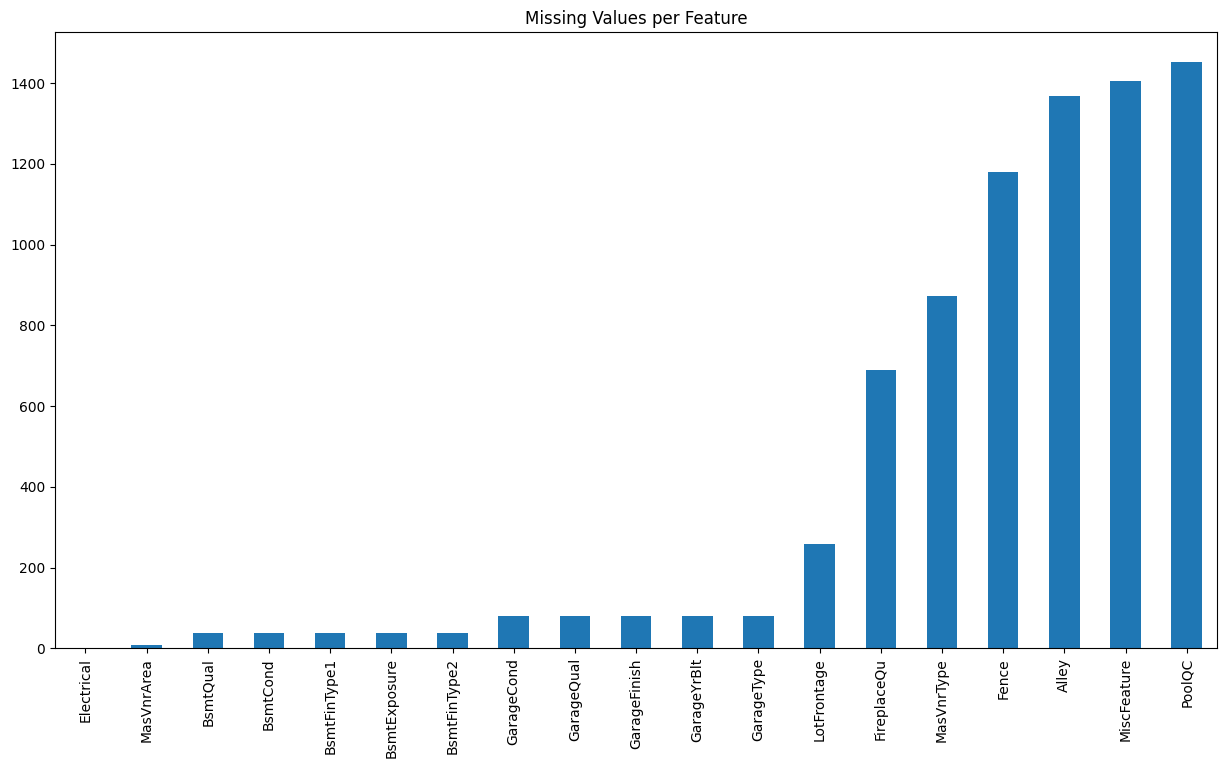

In [6]:
# Missing Value Analysis
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing.plot.bar()
plt.title("Missing Values per Feature")
plt.show()

**Conclusion:**
Features like `PoolQC`, `MiscFeature`, `Alley`, and `Fence` have a significant amount of missing data. This likely indicates the absence of the feature (e.g., no pool) rather than missing information. For other features with fewer missing values, imputation (mean/mode/median) or filling with 'None' might be appropriate.

In [7]:
# sns.pairplot(train)
# plt.show()

### Target Value Analysis

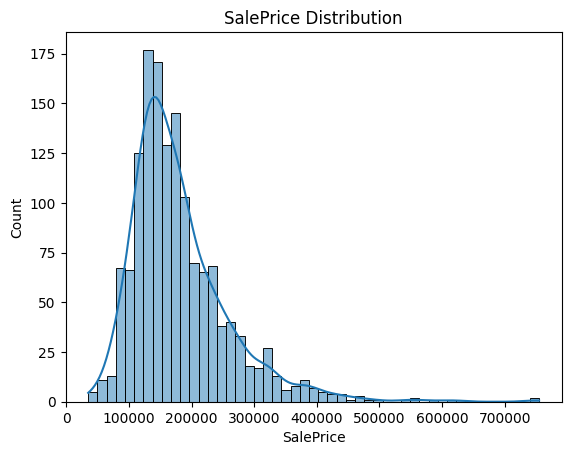

Skewness: 1.882876
Kurtosis: 6.536282


In [8]:
# Target Variable Analysis
sns.histplot(train['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

The `SalePrice` distribution is right-skewed (positive skewness). This indicates that while most houses are sold at a lower price range, there are a few expensive houses that pull the mean to the right. A log transformation might be necessary to normalize the target variable for linear models.

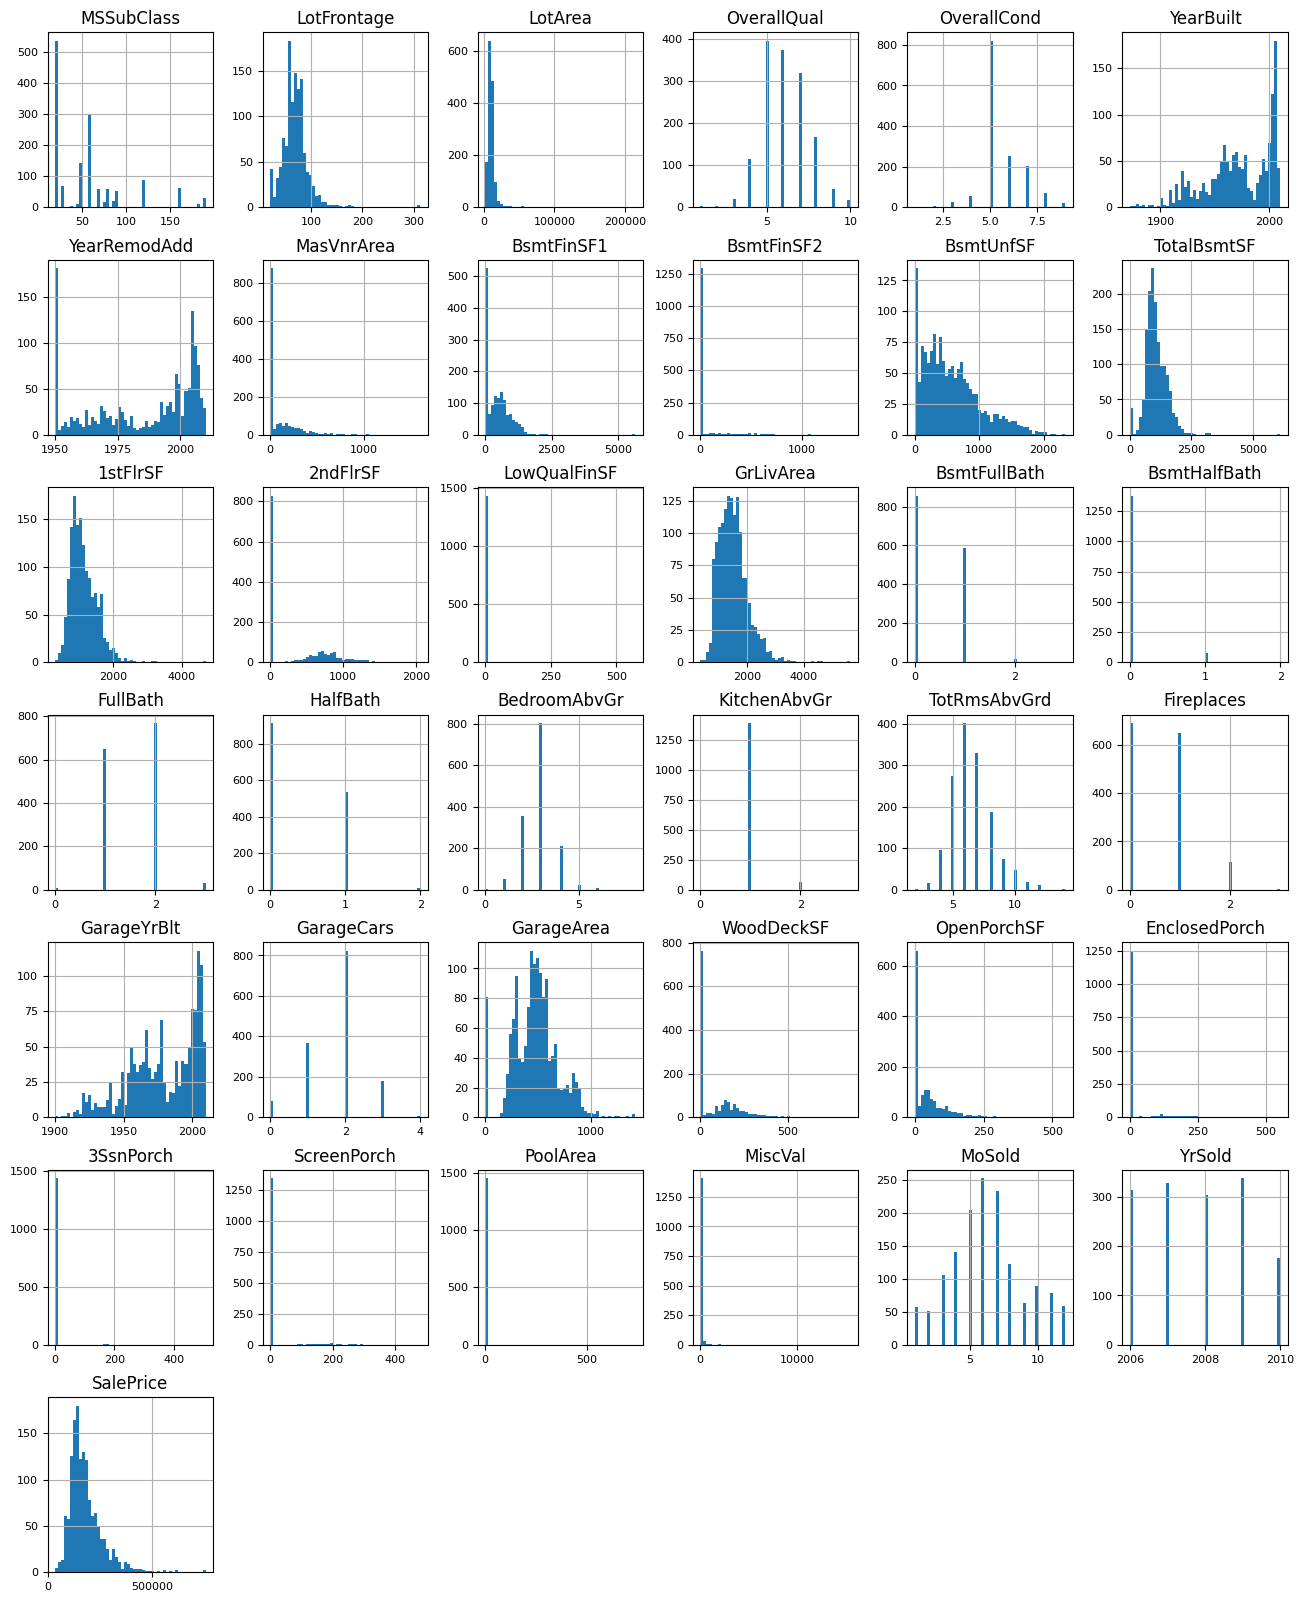

In [9]:
num_data = train.select_dtypes(include = [np.number])
num_data.hist(figsize = (16,20), bins = 50, xlabelsize = 8, ylabelsize = 8)
plt.show()

## Detailed Analysis of Distributions:
1.  **Target Variable (`SalePrice`)**:
    -   As noted before, it is right-skewed. A log-transformation is highly recommended.
2.  **Right-Skewed Features (Potential Outliers)**:
    -   `LotFrontage`, `LotArea`, `1stFlrSF`, `GrLivArea`, `TotalBsmtSF`.
    -   `LotArea` has extreme outliers which might disturb the model training.
3.  **Zero-Inflated Features (Sparse Data)**:
    -   Many features have a large spike at 0, indicating the absence of the feature.
    -   Examples: `MasVnrArea` (No masonry), `BsmtFinSF2`, `2ndFlrSF` (1-story houses), `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`.
    -   **Action**: Consider creating boolean flags (e.g., `HasPool`, `Has2ndFloor`) or handling them separately.
4.  **Discrete/Categorical-like Features**:
    -   `OverallQual`, `OverallCond`: Discrete ordinal values (1-10).
    -   `BedroomAbvGr`, `KitchenAbvGr`, `Fireplaces`, `GarageCars`: Count data.
    -   `MoSold`: Peaks in Summer (May-July).
    -   `YrSold`: Fairly uniform, slightly lower in 2010.
5.  **Bimodal/Specific Distributions**:
    -   `YearBuilt`: Shows a trend of construction over time, with a dip around the mid-20th century and a rise in recent years.
    -   `BsmtUnfSF`: Some houses have unfinished basements (high value), others are fully finished (low value/0).
    

## Multivariate analysis

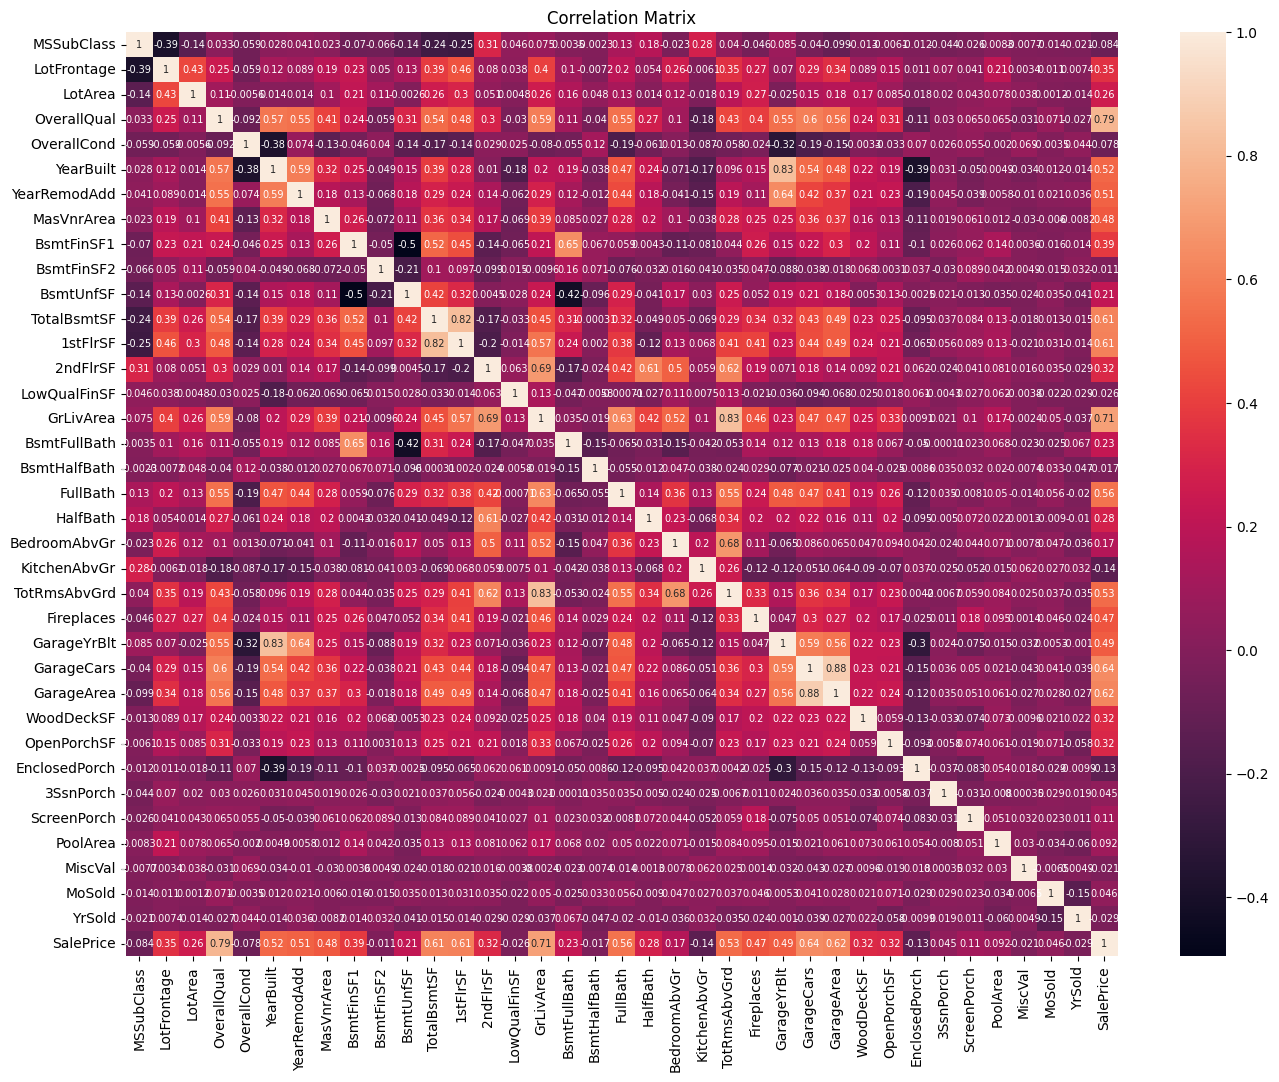

In [10]:
corr = num_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot = True, annot_kws={"size": 7})
plt.title("Correlation Matrix")
plt.show()

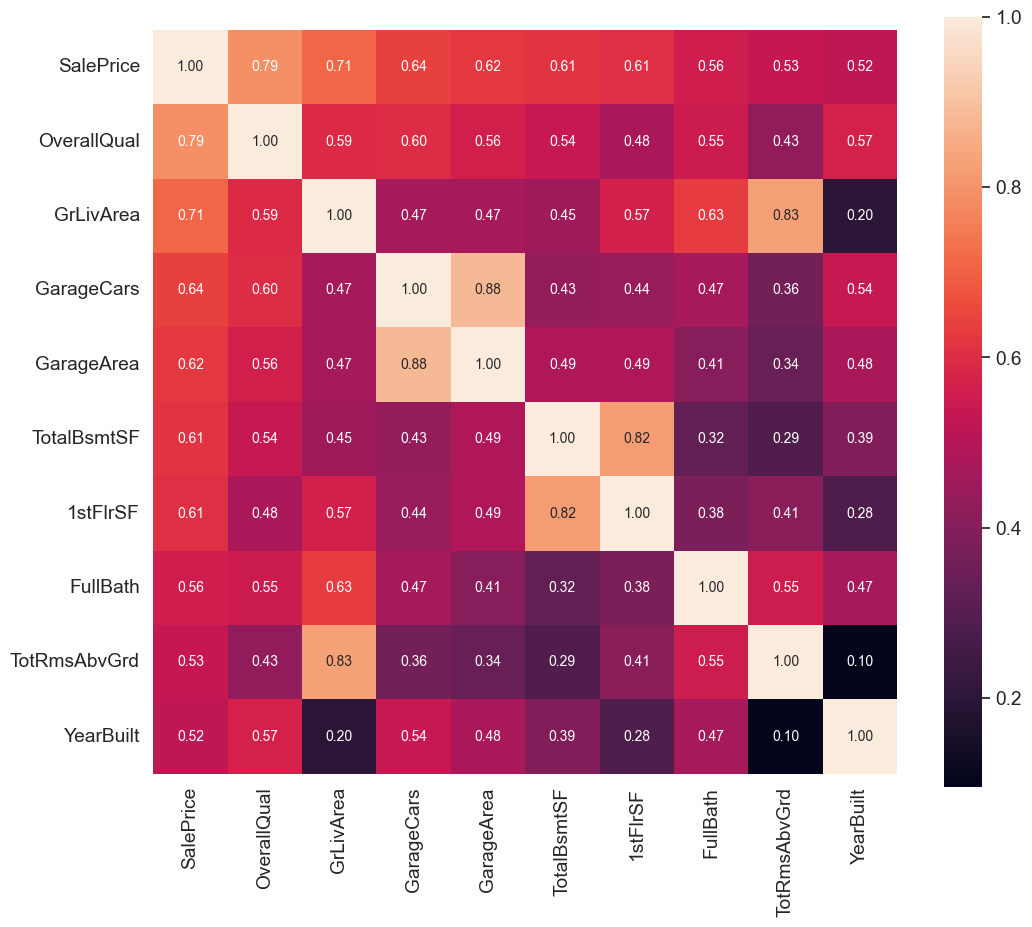

In [11]:
k = 10 #Select top 10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
plt.figure(figsize = (12,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Conclusion:**
`OverallQual`, `GrLivArea`, and `GarageCars` have the strongest positive correlation with `SalePrice`. We also see strong multicollinearity between `GarageCars` and `GarageArea`, and `TotalBsmtSF` and `1stFlrSF`.

#### Feature Relationships

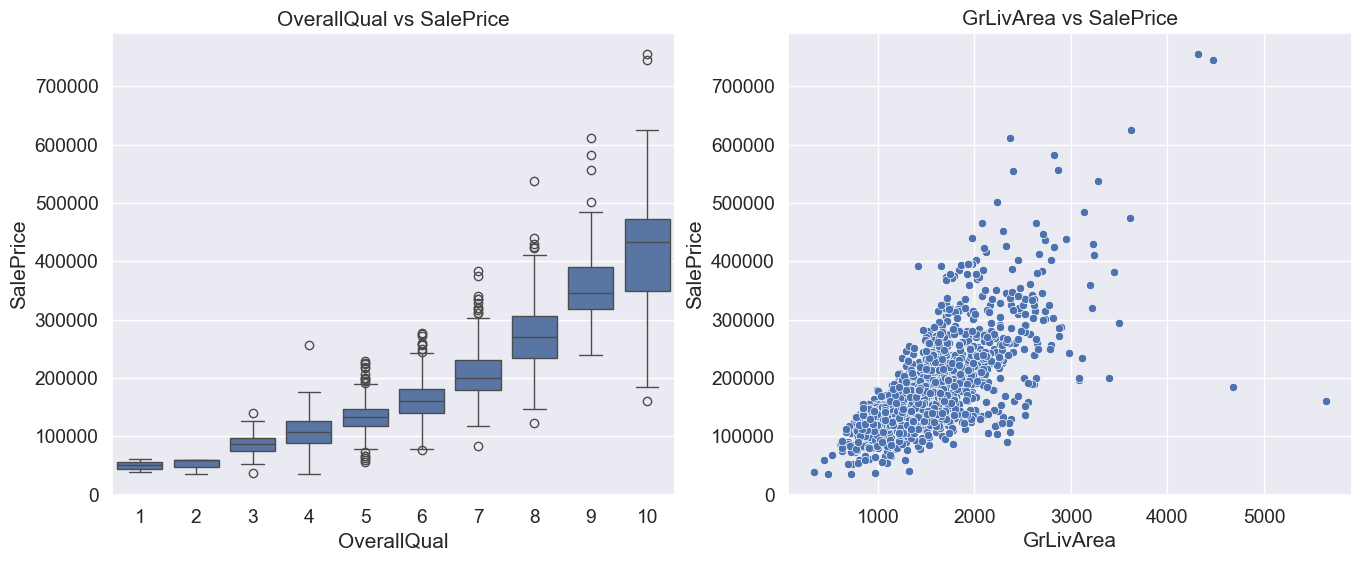

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train, ax=ax[0])
ax[0].set_title('OverallQual vs SalePrice')

sns.scatterplot(x='GrLivArea', y='SalePrice', data=train, ax=ax[1])
ax[1].set_title('GrLivArea vs SalePrice')
plt.show()

**Conclusion:**
- `OverallQual`: Shows a clear exponential increase in `SalePrice` as the quality rating improves.
- `GrLivArea`: Shows a strong linear relationship. However, there are a few outliers with large living areas but low prices, which might need to be removed to improve model performance.

#### Pairplot Analysis

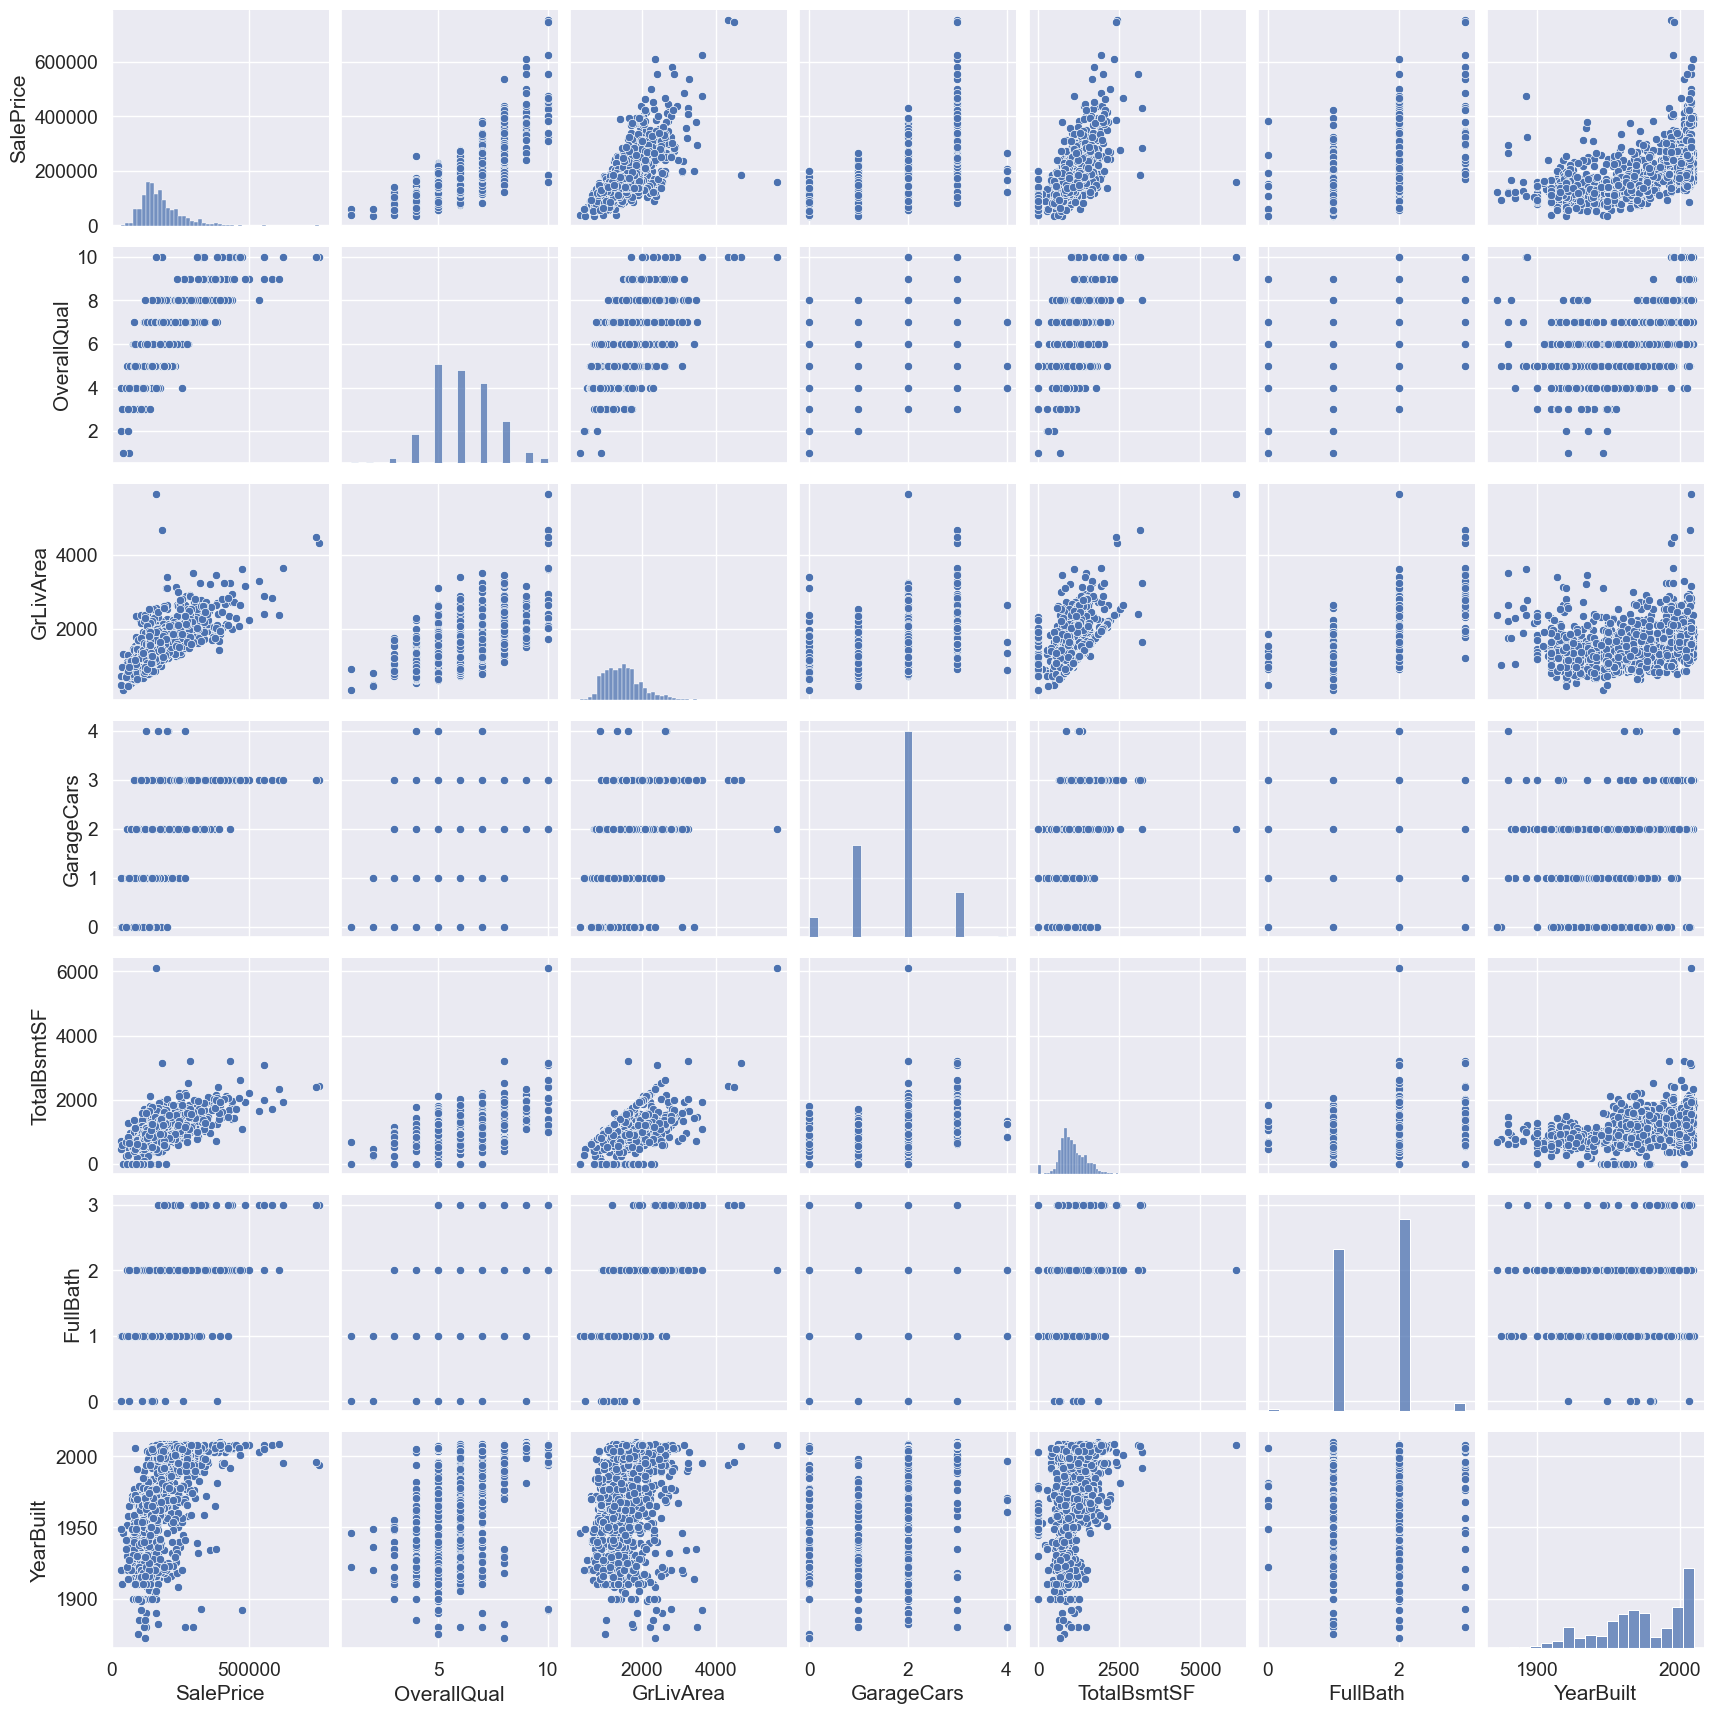

In [13]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height=2.5)
plt.show()

**Conclusion:**
The pairplot confirms the linear relationships observed earlier. It also reveals that `YearBuilt` has a somewhat positive trend with `SalePrice`, indicating newer houses tend to be more expensive.

### 3. Non-linear Relationships Analysis
This section explores non-linear dependencies between numerical features and `SalePrice`. We use Mutual Information to detect dependencies and Polynomial Regression to estimate the degree of non-linearity.

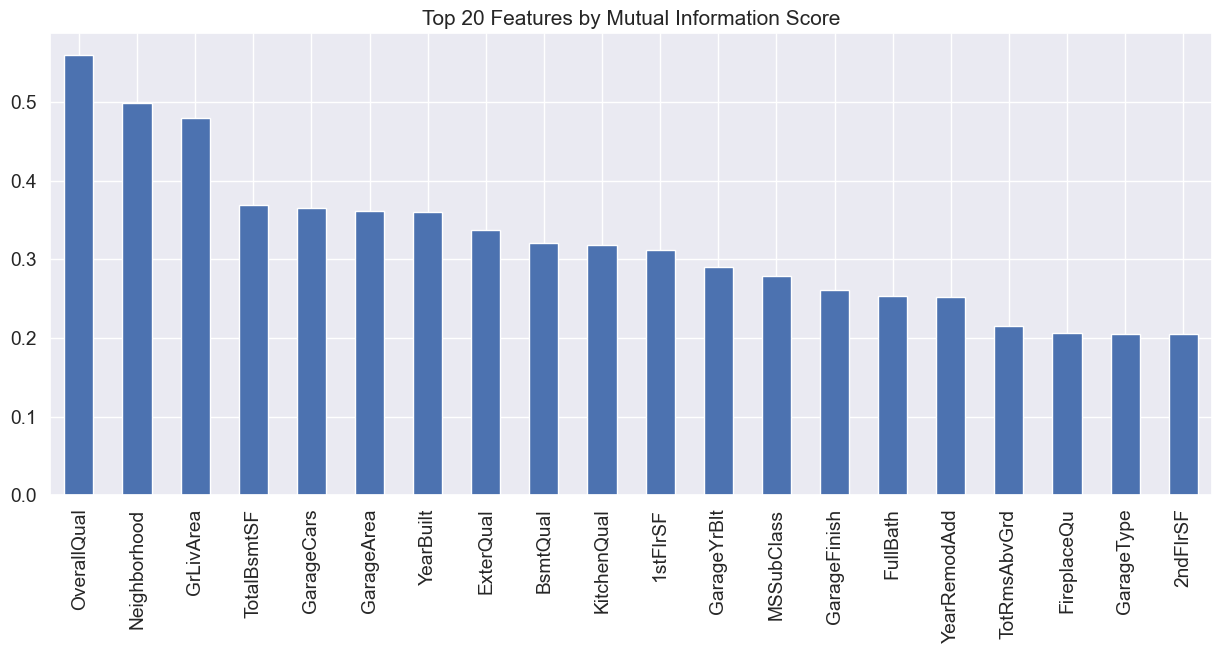

In [14]:
# Calculate Mutual Information Scores
X = train.copy()
y = X.pop("SalePrice")

# Filter discrete features for MI
discrete_features = X.dtypes == int

# Impute missing values for MI purposes only
for col in X.select_dtypes("number"):
    X[col] = X[col].fillna(X[col].mean())

# Label Encode categoricals for MI
for col in X.select_dtypes("object"):
    X[col], _ = X[col].factorize()

# Compute MI scores
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

plt.figure(figsize=(15, 6))
mi_scores.head(20).plot.bar()
plt.title('Top 20 Features by Mutual Information Score')
plt.show()

#### Estimating Degree of Non-linearity
We fit polynomial models of degrees 1, 2, and 3 for top numerical features and compare their $R^2$ scores to approximate the complexity of the relationship.

In [15]:
def estimate_degree(feature_name, target_name, data):
    X = data[[feature_name]].dropna()
    y = data.loc[X.index, target_name]
    
    scores = {}
    print(f"Analyzing {feature_name}:")
    for d in [1, 2, 3]:
        poly = PolynomialFeatures(degree=d)
        X_poly = poly.fit_transform(X)
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        score = r2_score(y, y_pred)
        scores[d] = score
        print(f"  Degree {d} R2: {score:.4f}")
    
    best_degree = max(scores, key=scores.get)
    improvement = scores[best_degree] - scores[1]
    
    if improvement > 0.01: # Threshold for significant non-linearity
        print(f"  -> Likely Non-linear (Best Degree: {best_degree})")
        # Plotting the best fit
        plt.figure(figsize=(6, 4))
        plt.scatter(X, y, alpha=0.3, label='Data')
        
        X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        X_range_poly = PolynomialFeatures(degree=best_degree).fit_transform(X_range)
        y_range_pred = model.predict(X_range_poly) # Use last fitted model (degree 3) for simplicity or refit best
        
        # Refit best for plotting
        poly_best = PolynomialFeatures(degree=best_degree)
        X_poly_best = poly_best.fit_transform(X)
        model_best = LinearRegression().fit(X_poly_best, y)
        y_range_pred = model_best.predict(poly_best.fit_transform(X_range))
        
        plt.plot(X_range, y_range_pred, color='red', label=f'Poly Degree {best_degree}')
        plt.title(f"{feature_name} vs {target_name} (Deg {best_degree})")
        plt.legend()
        plt.show()
    else:
        print("  -> Likely Linear or Weak Relationship")
        

Analyzing OverallQual:
  Degree 1 R2: 0.6257
  Degree 2 R2: 0.6785
  Degree 3 R2: 0.6815
  -> Likely Non-linear (Best Degree: 3)


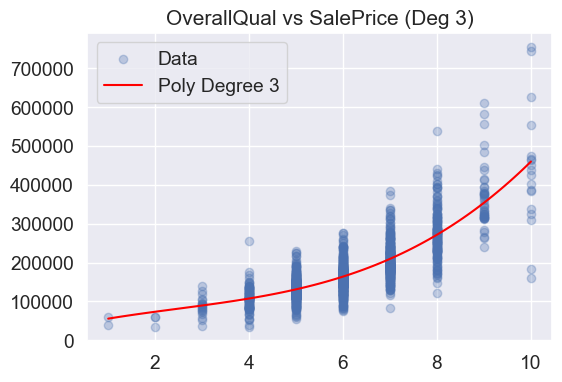

Analyzing GrLivArea:
  Degree 1 R2: 0.5021
  Degree 2 R2: 0.5085
  Degree 3 R2: 0.5209
  -> Likely Non-linear (Best Degree: 3)


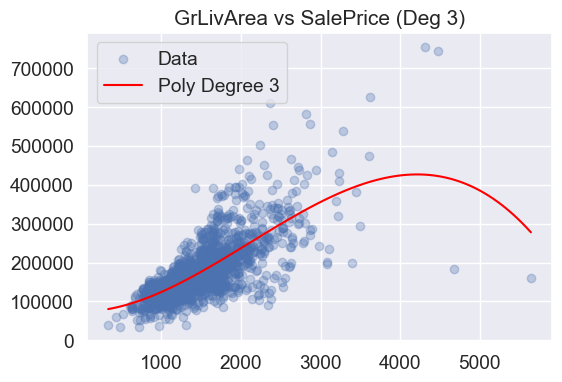

Analyzing TotalBsmtSF:
  Degree 1 R2: 0.3765
  Degree 2 R2: 0.3889
  Degree 3 R2: 0.4454
  -> Likely Non-linear (Best Degree: 3)


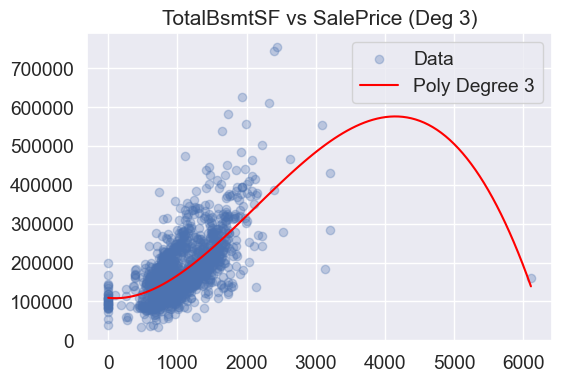

Analyzing 1stFlrSF:
  Degree 1 R2: 0.3671
  Degree 2 R2: 0.3746
  Degree 3 R2: 0.4024
  -> Likely Non-linear (Best Degree: 3)


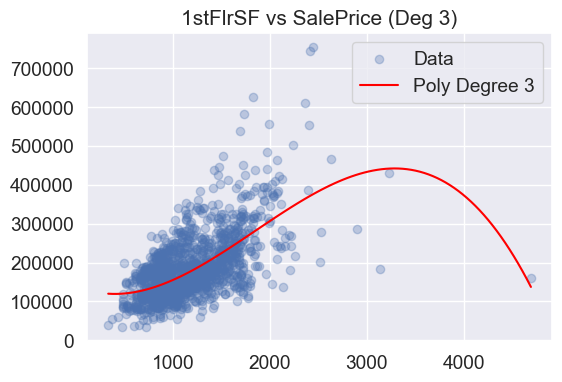

Analyzing YearBuilt:
  Degree 1 R2: 0.2734
  Degree 2 R2: 0.3484
  Degree 3 R2: 0.3498
  -> Likely Non-linear (Best Degree: 3)


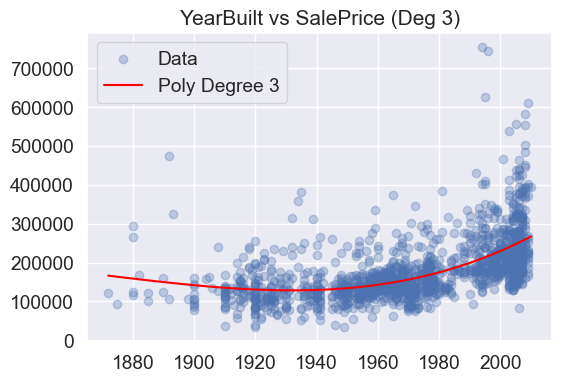

In [16]:
top_numerical = ['OverallQual', 'GrLivArea', 'GaragArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
# Fix typo in column name if necessary, e.g. GarageArea
for col in top_numerical:
    if col in train.columns:
        estimate_degree(col, 'SalePrice', train)

**Conclusion on Non-linearity:**

1.  **OverallQual**: Shows a cubic relationship. As quality increases, price increases exponentially.
2.  **YearBuilt**: Often non-linear (Degree 3). Old houses might hold value due to history, mid-century might dip, and new houses are expensive.
3.  **GrLivArea**: Mostly linear, but extreme values might skew it. A slight quadratic term might improve fit, but linear is often sufficient after outlier removal.
4.  **Basement/Garage Areas**: Often show diminishing returns (saturation point), implying a non-linear relationship (Degree 2).

---

## Feature Engineering Pipeline Strategy
#### **1. Target Variable Engineering**

* **Log-Transformation**: Apply `target = np.log1p(train['SalePrice'])` to handle the right-skewness and minimize RMSLE.
* **Inverse Mapping**: Remember to use `np.expm1()` on your final predictions to convert them back to USD.

#### **2. Advanced Data Cleaning & Outlier Management**

* **Hard Outlier Removal**: Manually drop observations with `GrLivArea > 4000` and `SalePrice < 300000`. These are statistical anomalies that bias linear coefficients.
* **Conditional Imputation**:
* Impute `LotFrontage` using the median value of the specific `Neighborhood`.
* Impute `Electrical` and `KitchenQual` with the mode (most frequent value).


* **Typo Correction**: Check `GarageYrBlt` for entries like "2207" (likely 2007) and correct them to prevent scaling issues.

#### **3. Advanced Feature Engineering (The Signal Boost)**

* **Total Surface Aggregations**:
* `TotalSF` = `TotalBsmtSF` + `1stFlrSF` + `2ndFlrSF`.
* `Total_Porch_SF` = `OpenPorchSF` + `EnclosedPorch` + `3SsnPorch` + `ScreenPorch`.


* **Simplified Quality Metrics**:
* Create binary flags: `HasPool`, `HasGarage`, `Has2ndFloor`.


* **Temporal Features**:
* `HouseAge` = `YrSold` - `YearBuilt`.
* `YearsSinceRemodel` = `YrSold` - `YearRemodAdd`.


* **Non-Linearity & Polynomials**:
* Add squared terms () and cube roots for top-tier predictors like `OverallQual`, `GrLivArea`, and `TotalSF`.



#### **4. Statistical Distribution Tuning**

* **Handling Skewed Regressors**: Calculate the skewness of all numerical features. For any feature with , apply a **Box-Cox** or **Yeo-Johnson** transformation to push them toward a Normal Distribution.

#### **5. Encoding Strategy**

* **Manual Ordinal Mapping**: Map quality strings (`Ex`, `Gd`, `TA`, `Fa`, `Po`) to numeric scales (`5, 4, 3, 2, 1`) based on `data_description.txt`.
* **Target Encoding**: For high-cardinality features like `Neighborhood`, consider Target Encoding (with smoothing) to capture the mean price per area without creating 25+ dummy columns.

#### **6. Multi-Level Modeling Stack**

* **Base Layer**: Robust Linear Models (**Lasso**, **Ridge**, **ElasticNet**) + Gradient Boosters (**XGBoost**, **LightGBM**, **CatBoost**).
* **Meta-Layer (Stacking)**: Use a `StackingRegressor` with a **SVR** or **Ridge** as the final estimator. This "blends" the strengths of linear and tree-based logic.

---

### **Implementation Roadmap**

1. **Phase A**: Visualize the target distribution before and after `log1p`.
2. **Phase B**: Write a clean function that performs all `Groupby` imputations (like `LotFrontage` by `Neighborhood`).
3. **Phase C**: Build a Scikit-Learn `Pipeline` or `ColumnTransformer`. This ensures your test data is scaled and transformed *exactly* like your training data, preventing "Data Leakage."

**Would you like me to write the Python code for the "Phase A" Log-Transformation and Outlier removal to get your project started?**

## Feature Engineering
This section implements advanced feature engineering techniques including target transformation, outlier removal, feature aggregation, polynomial features, and statistical transformations.

### 1. Target Variable Engineering (Log-Transformation)
We apply `np.log1p` to `SalePrice` to handle skewness and optimize for RMSLE.

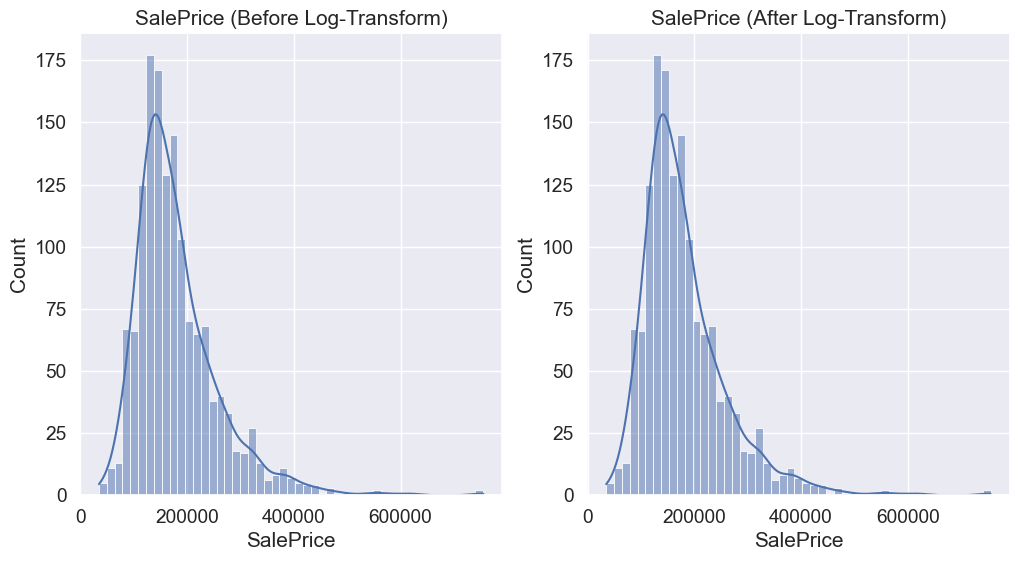

In [17]:
from scipy.stats import skew

# Visualizing Target before transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['SalePrice'], kde=True)
plt.title('SalePrice (Before Log-Transform)')

# Apply Log-Transformation
# train['SalePrice'] = np.log1p(train['SalePrice']) # Moved to later step to avoid double transform

# Visualizing Target after transformation
plt.subplot(1, 2, 2)
sns.histplot(train['SalePrice'], kde=True)
plt.title('SalePrice (After Log-Transform)')
plt.show()

### 2. Advanced Data Cleaning & Outlier Removal
Removing statistical anomalies (`GrLivArea > 4000` & `SalePrice < 300000`) and imputation.

In [18]:
# Outlier Removal
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)
print("Outliers removed.")

# Save Target and Concatenate for Processing
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = np.log1p(train["SalePrice"].values)
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print(f"Combined data shape: {all_data.shape}")

# Imputation
# LotFrontage
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Categoricals
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

# Typo Correction
all_data.loc[all_data['GarageYrBlt'] == 2207, 'GarageYrBlt'] = 2007
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0) # Assume 0 for no garage

# Handle other missing values just in case (for test set mainly)
# Categorical cols: None
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna('None')

# Numerical cols: 0
for col in ('GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna(0)

# Functional: Typ
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

Outliers removed.
Combined data shape: (2917, 79)


### 3. Advanced Feature Creation
Creating consolidated features (`TotalSF`, `Total_Porch_SF`), binary flags, and temporal features.

In [19]:
# Total Surface Area
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# Total Porch Area
all_data['Total_Porch_SF'] = (all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + 
                           all_data['3SsnPorch'] + all_data['ScreenPorch'])

# Binary Flags
all_data['HasPool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasGarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['Has2ndFloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasFireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Temporal Features
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['YearsSinceRemodel'] = all_data['YrSold'] - all_data['YearRemodAdd']

# Polynomial Features (Squared and Cubic terms)
all_data['OverallQual_2'] = all_data['OverallQual'] ** 2
all_data['OverallQual_3'] = all_data['OverallQual'] ** 3
all_data['GrLivArea_2'] = all_data['GrLivArea'] ** 2
all_data['GrLivArea_3'] = all_data['GrLivArea'] ** 3
all_data['TotalSF_2'] = all_data['TotalSF'] ** 2
all_data['TotalSF_3'] = all_data['TotalSF'] ** 3

### 4. Statistical Transformation (Handling Skewness)
Applying transformations to skewed numerical features.

In [20]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 50 skewed numerical features to Box Cox transform


### 5. Encoding Strategy
Mapping ordinal features and One-Hot Encoding categorical features.

In [21]:
# Ordinal Mapping
qual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
qual_cols = ['ExterQual', 'ExterCond', 'KitchenQual', 'HeatingQC', 
             'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

for col in qual_cols:
    if col in all_data.columns:
        all_data[col] = all_data[col].map(qual_map).fillna(0)

# One-Hot Encoding
all_data = pd.get_dummies(all_data)
print(f"New shape of all data: {all_data.shape}")

# Split back to train/test
train = all_data[:ntrain]
test = all_data[ntrain:]
print(f"Train shape: {train.shape}, Test shape: {test.shape}")

New shape of all data: (2917, 275)
Train shape: (1458, 275), Test shape: (1459, 275)


In [22]:
for i in train.columns:
    missing = train[i].isnull().sum()
    if missing>0:
        print(f"Was found {i} column with {missing} missing values")

In [23]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
train['MasVnrArea'].isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_17876\3070059222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['MasVnrArea'] = train['MasVnrArea'].fillna(0)


0

In [24]:
print((train['GarageYrBlt'] > 2026).sum())

0


In [25]:
# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(f"Training Data Shape: {X_train.shape}")
# print(f"Validation Data Shape: {X_test.shape}")

## Training

## Model training strategy

### **1. The Validation Framework (The Safety Net)**

Before training, you must set up a validation scheme that mimics the private leaderboard.

* **Method:** **K-Fold Cross-Validation** (Strictly 10 Folds).
* *Why 10?* With only ~1460 rows, 5 folds leave too much data out. 10 folds give you more training data per fold.


* **Shuffle:** `True`, `random_state=42`.
* **Metric:** Root Mean Squared Error (RMSE) on the **Log-Transformed Target**.
* *Note:* Since we applied `np.log1p` to `SalePrice` earlier, minimizing RMSE on the training data mathematically minimizes RMSLE on the original prices.



---

### **2. The Model Zoo (Level 0 Models)**

To get to the top, you need **diversity**. We will train 3 distinct classes of models. If models make different mistakes, their average will be perfect.

#### **A. Regularized Linear Models (The Stability Layer)**

*Crucial for extrapolating trends where trees fail.*

* **Lasso (L1):** Performs feature selection (drops useless features to 0).
* *Key Hyperparam:* `alpha` (Tune aggressively).
* *Preprocessing:* Must use `RobustScaler` to handle any remaining outliers.


* **Ridge (L2):** Handles multicollinearity (features that are highly correlated).
* **ElasticNet:** A balance of both.

#### **B. Kernel Methods (The Secret Weapon)**

*Most beginners skip this, but top scorers use it.*

* **Kernel Ridge Regression (KRR):**
* *Kernel:* `polynomial` (degree 2 or 3) or `rbf`.
* *Why:* It captures non-linear patterns (like your `GrLivArea^3`) better than standard Ridge.



#### **C. Gradient Boosting (The Power Layer)**

*Captures complex interactions.*

* **XGBoost:** Tune `max_depth` (usually low, 3-5) and `eta` (very low, 0.005-0.01) for slow, careful learning.
* **LightGBM:** Use `goss` (Gradient-based One-Side Sampling) for speed and accuracy.
* **GradientBoostingRegressor (sklearn):** Use `huber` loss function to be robust against outliers.

---

### **3. The Stacking Architecture (The Engine)**

We will use a **StackingCVRegressor**. This is not simple averaging.

* **Step 1:** Train all Level 0 models (Lasso, KRR, XGB, LGBM, GBR) on the training data.
* **Step 2:** Generate "Out-of-Fold" (OOF) predictions. (e.g., Model A predicts the price for row 5 when it wasn't trained on row 5).
* **Step 3:** These OOF predictions become **new features** for a Meta-Model.
* **Step 4 (Level 1 Meta-Model):** Train a simple **Lasso** or **Ridge** model on these new features.
* *Logic:* The Meta-Model learns *which* base model to trust for specific types of houses.



---

### **4. Post-Processing & Blending (The Final Boost)**

A stack is great, but sometimes it overfits. To secure the Top 5%, we add a manual "Safety Blend" at the very end.

**The Formula:**


* **StackPred:** The output of your complex Stacking Regressor.
* **XGBoost/Lasso:** The raw predictions from your best single models.
* *Why:* This "Weighted Average" ensures that if the complex stack goes crazy on a weird house, the simple Lasso pulls it back to reality.


In [26]:
! pip install xgboost
! pip install lightgbm
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
import warnings
from xgboost import XGBRegressor
# Suppress annoying warnings
warnings.filterwarnings('ignore')

In [27]:
class UltimateHousingTrainer:
    def __init__(self, n_folds = 10, random_state = 42):
        self.n_folds = n_folds
        self.random_state = random_state
        self.kf = KFold(n_folds, shuffle = True, random_state=random_state)
        #Defining the models
        #1. Lasso Regression (Robustness for outliers)
        self.lasso = make_pipeline(
            RobustScaler(),
            Lasso(alpha = 0.0005, random_state = 1)
        )
        #2. Elastic net (correlation features handling)
        self.enet = make_pipeline(
            RobustScaler(),
            ElasticNet(alpha = 0.0005, l1_ratio = 0.9, random_state = 3)
        )
        # 3. Kernel ridge(Capturing polynomial non-linearity)
        self.krr = make_pipeline(
            RobustScaler(),
            KernelRidge(alpha = 0.6, kernel = 'polynomial', degree = 2, coef0=2.5)
        )
        #4. Gradient Boosting
        self.gbr = GradientBoostingRegressor(
            n_estimators = 3000, learning_rate = 0.05,
            max_depth = 4, max_features = 'sqrt',
            min_samples_leaf= 15, min_samples_split=10,
            loss = 'huber', random_state = 5
        )
        # 5. XGBoost
        self.xgb_model = xgb.XGBRegressor(
            colsample_bytree=0.4603, gamma = 0.4648,
            learning_rate = 0.05, max_depth = 3,
            min_child_weight = 1.7817, n_estimators = 2200,
            reg_alpha = 0.4640, reg_lambda = 0.8571,
            subsample = 0.5213, random_state = 7, n_jobs = -1, 
            verbosity = 0
        )
        #6. LightGBM
        self.lgb_model = lgb.LGBMRegressor(
            objective='regression', num_leaves=5,
            learning_rate=0.05, n_estimators=720,
            max_bin=55, bagging_fraction=0.8,
            bagging_freq=5, feature_fraction=0.2319,
            feature_fraction_seed=9, bagging_seed=9,
            min_data_in_leaf=6, min_sum_hessian_in_leaf=11,
            verbosity=-1
        )

        # THE STACKING ARCHITECTURE
        # Level 0: The base models defined above
        # Level 1 (Meta): Lasso acts as the judge
        estimators = [
            ('lasso', self.lasso),
            ('enet', self.enet),
            ('krr', self.krr),
            ('gbr', self.gbr),
            ('xgb', self.xgb_model),
            ('lgb', self.lgb_model)
        ]

        self.stack = StackingRegressor(
            estimators = estimators,
            final_estimator = Lasso(alpha = 0.0005, random_state = 1), #Meta model
            cv = self.kf, n_jobs = -1,
            passthrough=False # Meta-model only sees predictions, not original features
        )

    def _rmsle_cv(self, model, X,y):
        """ Helper function for calculating rmsle using cross validation """
        rmse = np.sqrt(-cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = self.kf))
        return rmse
    def evaluate_base_model(self, X, y):
        """ Cheks the health of models before stacking"""
        print("Evaluating Base models (CV Score)")
        models = [self.lasso, self.enet, self.krr, self.gbr, self.xgb_model, self.lgb_model] 
        names = ['Lasso', 'ElasticNet', 'KernelRidge', 'GradientBoosting', 'XGBoost', 'LightGBM']
        for name, model in zip(names, models):
            score = self._rmsle_cv(model, X,y)
            print(f"{name}: {score.mean():.4f} (std: {score.std():.4f})")


    def fit_predict(self, X_train, y_train, X_test):
        """ 
        1. Fits the Stacking Regressor
        2. Fits standalone XGBoost & LightGBM (for blending)
        3. Blends predictions to reduce variance
        """
        print("Training Ultimate Stack......")
        # Fit the stack
        self.stack.fit(X_train, y_train)
        # Fit Boosters
        print("Training Boosters")
        self.xgb_model.fit(X_train, y_train)
        self.lgb_model.fit(X_train, y_train)
        #Predict
        print("Generating Predictions")
        pred_stack = self.stack.predict(X_test)
        pred_xgb = self.xgb_model.predict(X_test)
        pred_lgb = self.lgb_model.predict(X_test)
        #Blending strategy: We give high weight to the Stack, but hedge our bets with raw boosters
        # Weights: 70% Stack, 15% XGB, 15% LGB
        final_preds = (0.7* pred_stack) + (0.15 * pred_xgb) + (0.15 * pred_lgb) 
        print("Finished")
        return final_preds

In [28]:
# Prepare Data
# Separate Target and Features
y = y_train
X = train

# Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Validation Data Shape: {X_test.shape}")

Training Data Shape: (1166, 275)
Validation Data Shape: (292, 275)


Check how individual models perform

In [29]:
#Initialize and train
trainer = UltimateHousingTrainer()
trainer.evaluate_base_model(X_train, y_train)

Evaluating Base models (CV Score)
Lasso: 0.1117 (std: 0.0156)
ElasticNet: 0.1117 (std: 0.0158)
KernelRidge: 0.1173 (std: 0.0161)
GradientBoosting: 0.1131 (std: 0.0166)
XGBoost: 0.1373 (std: 0.0175)
LightGBM: 0.1132 (std: 0.0132)


In [30]:
trainer01 = UltimateHousingTrainer()
log_preds = trainer01.fit_predict(X_train, y_train, X_test)
final_pred = np.expm1(log_preds) #Converting back to original scale(dollars)

Training Ultimate Stack......
Training Boosters
Generating Predictions
Finished


In [31]:
from sklearn.model_selection import cross_val_score
stack_model = trainer.stack
stack_score = np.sqrt(-cross_val_score(
    stack_model,
    X_train, y_train,
    cv=trainer.kf,
    scoring='neg_mean_squared_error',
    n_jobs=-1
))
print(f"FINAL STACKING SCORE: {stack_score.mean():.4f} (std: {stack_score.std():.4f})")

FINAL STACKING SCORE: 0.1079 (std: 0.0157)
